In [19]:
import pandas as pd

In [44]:
df = pd.read_csv("Telco-Customer-Churn.csv")

df.drop(columns=['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.shape

(7043, 20)

In [46]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [48]:
X = df.drop(columns=["Churn"], axis=1)
Y = df["Churn"]

In [49]:
X.shape

(7043, 19)

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

text_columns = set()

for column in X.columns:
    if X[column].dtype == 'object':
        if X[column].nunique() <= 2:  # Binary Categories → Label Encoding
            X.loc[:, column] = label_encoder.fit_transform(X[column])
        else:  # More than 2 Unique Categories → One-Hot Encoding
            text_columns.add(column)

# One-Hot Encoding for categorical columns with more than 2 unique values
X_encoded = pd.get_dummies(X, columns=list(text_columns), drop_first=True).astype(int)

print(X_encoded.head())



   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  DeviceProtection_No internet service  \
0                 1              29                                     0   
1                 0              56                                     0   
2                 1              53                                     0   
3                 0              42                                     0   
4                 1              70                                     0   

   DeviceProtection_Yes  ...  OnlineSecurity_Yes  \
0                     0  ...                   0   
1     

In [51]:
X_encoded.shape

(7043, 6559)

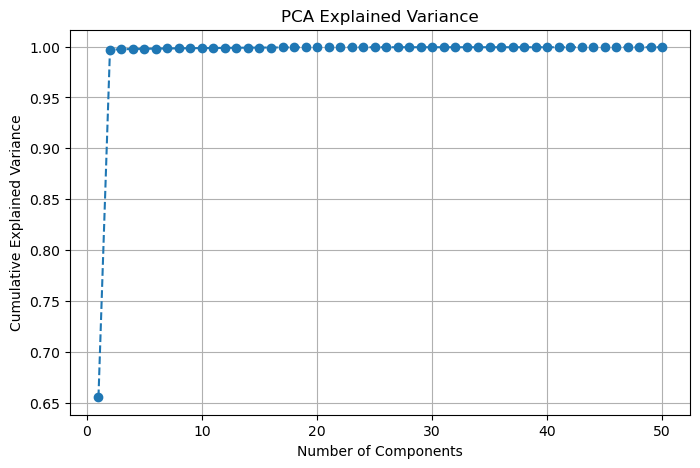

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=50)  # Keep 50 principal components
X_pca = pca.fit_transform(X_encoded)

# Explained Variance Ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot Cumulative Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

In [59]:
print(f"Reduced shape: {X_pca.shape}")  # New dataset with fewer features


Reduced shape: (7043, 50)


In [62]:
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50'],
      dtype='object')

In [63]:
Y_encoded = Y.map({'Yes':1, 'No':0})
Y_encoded.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [64]:
df_encoded = pd.concat([X_pca_df, Y_encoded], axis=1)

In [65]:
df_encoded.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,Churn
0,-45.269219,-13.384020,-1.756204,0.617221,0.934052,-0.627395,0.195405,-0.142792,0.142101,0.147159,...,0.000962,0.000116,-0.000749,0.001187,0.000319,-0.000333,-0.000663,-0.000350,-0.000541,0
1,-6.815462,4.996457,-0.871265,-0.269470,-0.853653,0.637841,-0.356288,0.870018,-0.636275,0.053584,...,0.000206,-0.001440,-0.000816,-0.001367,-0.001939,0.001700,-0.001479,0.003686,-0.000638,0
2,-23.143484,-22.684441,-0.887393,-0.293347,-0.543394,0.486409,-0.600916,-0.004873,-0.006578,0.952810,...,0.001264,-0.000249,-0.001116,-0.000532,0.001825,-0.003016,-0.001880,0.003057,-0.000800,1
3,-14.786622,20.907038,-1.964992,0.081266,-0.690859,0.565864,0.157586,0.645466,-0.362312,-0.423577,...,-0.000700,-0.001264,0.000848,0.001178,-0.002828,0.003092,0.000170,-0.000011,0.000675,0
4,-7.765002,-29.934988,-0.011029,0.750901,0.108908,-0.519075,-0.266135,-0.115131,-0.080343,0.009241,...,-0.000675,0.000730,-0.000875,0.000157,-0.001393,0.001521,-0.002796,0.002107,-0.005623,1


In [66]:
# 1.CHECK IMBALANCE DATA

df_encoded['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [67]:
X = df_encoded.drop(columns=["Churn"], axis=1)

Y = df_encoded["Churn"]

In [68]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-45.269219,-13.384020,-1.756204,0.617221,0.934052,-0.627395,0.195405,-0.142792,0.142101,0.147159,...,-0.000181,0.000962,0.000116,-0.000749,0.001187,0.000319,-0.000333,-0.000663,-0.000350,-0.000541
1,-6.815462,4.996457,-0.871265,-0.269470,-0.853653,0.637841,-0.356288,0.870018,-0.636275,0.053584,...,-0.002895,0.000206,-0.001440,-0.000816,-0.001367,-0.001939,0.001700,-0.001479,0.003686,-0.000638
2,-23.143484,-22.684441,-0.887393,-0.293347,-0.543394,0.486409,-0.600916,-0.004873,-0.006578,0.952810,...,-0.000950,0.001264,-0.000249,-0.001116,-0.000532,0.001825,-0.003016,-0.001880,0.003057,-0.000800
3,-14.786622,20.907038,-1.964992,0.081266,-0.690859,0.565864,0.157586,0.645466,-0.362312,-0.423577,...,-0.002205,-0.000700,-0.001264,0.000848,0.001178,-0.002828,0.003092,0.000170,-0.000011,0.000675
4,-7.765002,-29.934988,-0.011029,0.750901,0.108908,-0.519075,-0.266135,-0.115131,-0.080343,0.009241,...,-0.000840,-0.000675,0.000730,-0.000875,0.000157,-0.001393,0.001521,-0.002796,0.002107,-0.005623


In [69]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X, Y)

print("Class distribution after SMOTE:", Counter(Y_resampled))


Class distribution after SMOTE: Counter({0: 5174, 1: 5174})


In [70]:
X_resampled.shape, Y_resampled.shape

((10348, 50), (10348,))

In [71]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_scaled = standard_scaler.fit_transform(X_resampled)

X_scaled_df = pd.DataFrame(X_scaled,columns=X_resampled.columns)

X_scaled_df.columns


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50'],
      dtype='object')

In [72]:
X_scaled_df.shape, Y_resampled.shape

((10348, 50), (10348,))

In [73]:
X_scaled_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-1.543054,-0.351040,-2.349083,0.922245,1.812323,-1.299009,0.402664,-0.311684,0.340490,0.365845,...,-0.011485,0.036450,0.009046,-0.029296,0.033183,0.009891,0.001188,-0.015412,-0.020720,-0.020184
1,-0.262284,0.469452,-1.175012,-0.620178,-1.765332,1.339414,-0.752589,2.184293,-1.520510,0.132280,...,-0.128734,0.005709,-0.055363,-0.032090,-0.065161,-0.084384,0.092278,-0.051706,0.162222,-0.024231
2,-0.806118,-0.766205,-1.196409,-0.661712,-1.144423,1.023630,-1.264844,0.028206,-0.014984,2.376745,...,-0.044721,0.048725,-0.006063,-0.044698,-0.032994,0.072767,-0.119020,-0.069531,0.133735,-0.031042
3,-0.527778,1.179690,-2.626086,-0.010062,-1.439540,1.189319,0.323471,1.630906,-0.865499,-1.058711,...,-0.098917,-0.031150,-0.048058,0.037825,0.032826,-0.121498,0.154628,0.021602,-0.005369,0.030793
4,-0.293911,-1.089864,-0.033716,1.154786,0.160998,-1.073128,-0.563806,-0.243514,-0.191346,0.021600,...,-0.039948,-0.030153,0.034475,-0.034592,-0.006472,-0.061621,0.084270,-0.110246,0.090633,-0.233146


In [74]:
X_scaled_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50'],
      dtype='object')

In [75]:
X_scaled_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-1.543054,-0.351040,-2.349083,0.922245,1.812323,-1.299009,0.402664,-0.311684,0.340490,0.365845,...,-0.011485,0.036450,0.009046,-0.029296,0.033183,0.009891,0.001188,-0.015412,-0.020720,-0.020184
1,-0.262284,0.469452,-1.175012,-0.620178,-1.765332,1.339414,-0.752589,2.184293,-1.520510,0.132280,...,-0.128734,0.005709,-0.055363,-0.032090,-0.065161,-0.084384,0.092278,-0.051706,0.162222,-0.024231
2,-0.806118,-0.766205,-1.196409,-0.661712,-1.144423,1.023630,-1.264844,0.028206,-0.014984,2.376745,...,-0.044721,0.048725,-0.006063,-0.044698,-0.032994,0.072767,-0.119020,-0.069531,0.133735,-0.031042
3,-0.527778,1.179690,-2.626086,-0.010062,-1.439540,1.189319,0.323471,1.630906,-0.865499,-1.058711,...,-0.098917,-0.031150,-0.048058,0.037825,0.032826,-0.121498,0.154628,0.021602,-0.005369,0.030793
4,-0.293911,-1.089864,-0.033716,1.154786,0.160998,-1.073128,-0.563806,-0.243514,-0.191346,0.021600,...,-0.039948,-0.030153,0.034475,-0.034592,-0.006472,-0.061621,0.084270,-0.110246,0.090633,-0.233146


In [76]:
from sklearn.feature_selection import VarianceThreshold

variance_threshold = VarianceThreshold(threshold=0.1)

df_selected = variance_threshold.fit_transform(X_scaled_df)

selected_features = X_scaled_df.columns[variance_threshold.get_support()]

print("selected features are", selected_features)



selected features are Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50'],
      dtype='object')


In [77]:

new_df = pd.DataFrame(df_selected, columns=selected_features)

new_df.shape

(10348, 50)

In [78]:
from sklearn.feature_selection import mutual_info_classif

mi_classif = mutual_info_classif(new_df, Y_resampled)

mi_classif

array([0.11692143, 0.19877921, 0.10340423, 0.05957277, 0.0407367 ,
       0.09324904, 0.02080397, 0.15765976, 0.04792037, 0.05990489,
       0.01956529, 0.02453464, 0.02287294, 0.02140293, 0.02202636,
       0.0254521 , 0.05184945, 0.06583197, 0.0259025 , 0.0939432 ,
       0.05598219, 0.03081691, 0.03001366, 0.03898715, 0.01970619,
       0.03234895, 0.07677672, 0.01719491, 0.01351328, 0.01274601,
       0.00591971, 0.06002631, 0.02541196, 0.02248366, 0.00639139,
       0.01579183, 0.01219566, 0.02806959, 0.01311045, 0.01778286,
       0.02694714, 0.02174484, 0.02504067, 0.02230216, 0.01287833,
       0.01760572, 0.01953561, 0.04161329, 0.03330412, 0.05196662])

In [82]:
# Convert to Pandas DataFrame with Feature Names
mi_df = pd.DataFrame(data=new_df, columns= new_df.columns)

# Sort Features by Importance
# mi_df = mi_df.sort_values(by="Mutual_Information", ascending=False)

print(mi_df)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.543054 -0.351040 -2.349083  0.922245  1.812323 -1.299009  0.402664   
1     -0.262284  0.469452 -1.175012 -0.620178 -1.765332  1.339414 -0.752589   
2     -0.806118 -0.766205 -1.196409 -0.661712 -1.144423  1.023630 -1.264844   
3     -0.527778  1.179690 -2.626086 -0.010062 -1.439540  1.189319  0.323471   
4     -0.293911 -1.089864 -0.033716  1.154786  0.160998 -1.073128 -0.563806   
...         ...       ...       ...       ...       ...       ...       ...   
10343  0.017463 -1.174378  0.211200  0.914261  0.015589 -1.061992  0.475827   
10344 -1.161781 -0.416782 -2.344844 -1.092318 -1.413826  1.125780  0.640931   
10345 -0.975994 -0.314321 -1.075391  0.714707 -0.426767 -1.073852 -0.711905   
10346 -1.726116  0.133781  1.140325  0.211156 -0.836204 -0.019458  0.708241   
10347  0.249511 -0.938177 -0.035834 -0.549916 -0.354446  0.416254 -0.675960   

            PC8       PC9      PC10  ...      PC41 

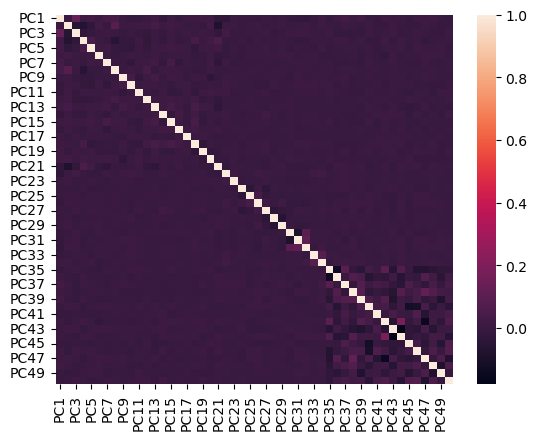

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(mi_df.corr())
plt.show()

In [85]:
correlated_columns = set()

corr_matrix = mi_df.corr().abs()

threshold = 0.8

for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j] > threshold:
         correlated_columns.add(corr_matrix.columns[i])


print("Highly Correlated Columns", correlated_columns)


df_filtered =  mi_df.drop(columns=correlated_columns)

Highly Correlated Columns set()


In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mi_df, Y_resampled, test_size=0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7243, 50), (3105, 50), (7243,), (3105,))

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.7632850241545893


In [88]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8486312399355878


In [90]:
!pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 5.0/150.0 MB 13.1 MB/s eta 0:00:12
   - -------------------------------------- 7.3/150.0 MB 12.6 MB/s eta 0:00:12
   -- ------------------------------------- 8.4/150.0 MB 10.4 MB/s eta 0:00:14
   -- ------------------------------------- 8.7/150.0 MB 9.4 MB/s eta 0:00:16
   -- ------------------------------------- 9.4/150.0 MB 7.9 MB/s eta 0:00:18
   -- ------------------------------------- 10.5/150.0 MB 7.5 MB/s eta 0:00:19
   --- ------------------------------------ 12.1/150.0 MB 7.4 MB/s eta 0:00:19
   --- ------------------------------------ 13.9/150.0 MB 7.6 MB/s eta 0:00:18
   ---- ----------------------------------- 16.3/150.0 MB 7.9 MB/s eta 0:00:17
   ---- ----------------------------------- 18.6/150.0 MB 8.2 MB/s eta 0:00:16
   ----- ---------------------------------- 19.9/150.0 MB 8.2

In [91]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
print("XGB Classifier Accuracy:", accuracy_score(y_test, y_pred))



c:\Users\sande\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB Classifier Accuracy: 0.8412238325281803


In [92]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print("SVC ACCURACY is ", accuracy_score(y_test, y_pred))

SVC ACCURACY is  0.8045088566827697


In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import randint

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Randomized Search for Random Forest
rf_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
rf_search.fit(x_train, y_train)
print("Best Random Forest Params:", rf_search.best_params_)

# Perform Randomized Search for XGBoost
xgb_search = RandomizedSearchCV(xgb, xgb_param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
xgb_search.fit(x_train, y_train)
print("Best XGBoost Params:", xgb_search.best_params_)


Best Random Forest Params: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 108}


c:\Users\sande\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:08:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 17, 'n_estimators': 156, 'subsample': 0.6}


In [ ]:
random_classfier_ = RandomForestClassifier(max_depth=14, min_samples_leaf=1,min_samples_split=2, n_estimators=108 )
random_classifier_model = random_classfier_.fit(x_train, y_train)
random_classifer_pred = random_classifier_model.predict(x_test)
print("priting accuracy is", accuracy_score(y_test, random_classifer_pred))


priting accuracy is 0.8386473429951691


In [96]:

xgb_classifier_ = XGBClassifier(**xgb_search.best_params_ ,use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier__model = xgb_classifier_.fit(x_train, y_train)
xgb_classifier_pred = xgb_classifier_.predict(x_test)
print("priting accuracy is", accuracy_score(y_test, xgb_classifier_pred))


c:\Users\sande\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:13:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


priting accuracy is 0.8592592592592593


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def metric_accuracy(y_test, y_pred):
    print("Accuracy", accuracy_score(y_test, y_pred))
    print("Precision", precision_score(y_test, y_pred))
    print("Recall", recall_score(y_test, y_pred))
    print("f1_score", f1_score(y_test, y_pred))
    print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


In [99]:
metric_accuracy(y_test, random_classifer_pred)

Accuracy 0.8386473429951691
Precision 0.8054892601431981
Recall 0.8852459016393442
f1_score 0.8434864104967198

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1580
           1       0.81      0.89      0.84      1525

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [101]:
metric_accuracy(y_test, xgb_classifier_pred)

Accuracy 0.8592592592592593
Precision 0.8412797992471769
Recall 0.879344262295082
f1_score 0.8598909907021481

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1580
           1       0.84      0.88      0.86      1525

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105

